In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

<br>
<br>

# 단순 워드 클라우드

In [2]:
# 단어 설정
text = "square"

# 0~299까지의 숫자가 입력된 2차원 배열 생성
x, y = np.ogrid[:300, :300]

In [3]:
# 행으로 확장
x


array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [4]:
# 열로 확장
y


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [5]:
# 마스크 생성
# ** : 거듭제곱
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

In [6]:
# 전체 마스크
mask


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [7]:
# 앞부분 행의 마스크
mask[50]


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [8]:
# 중간 행의 마스크
mask[150]


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [9]:
# 뒷부분 행의 마스크
mask[250]


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

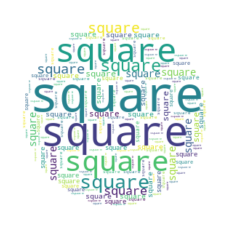

In [10]:
# 워드 클라우드 생성
# repeat=True : 같은 단어를 반복
# mask : 마스크 형태에 따라 단어 배치
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

# 이미지 출력
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


<br>
<br>

# 텍스트에서 워드 클라우드 생성

In [11]:
# 현재 디렉토리 구함
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# 텍스트 로드
text = open(path.join(d, 'starwars.txt')).read()
print(text)




                                        STAR WARS

                                        Episode IV

                                        A NEW HOPE

                                         From the
                                  JOURNAL OF THE WHILLS

                                            by
                                       George Lucas

                                   Revised Fourth Draft
                                     January 15, 1976

                                      LUCASFILM LTD.

                

               A long time ago, in a galaxy far, far, away...

               A vast sea of stars serves as the backdrop for the main title. 
               War drums echo through the heavens as a rollup slowly crawls 
               into infinity.

                    It is a period of civil war. Rebel spaceships, 
                    striking from a hidden base, have won their first 
                    victory against the evil Galactic Empire.

 

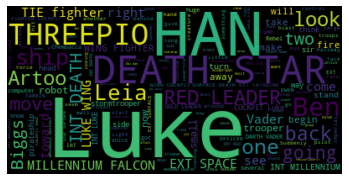

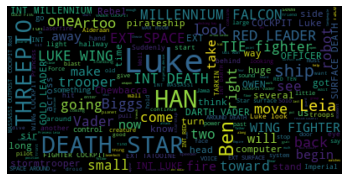

In [12]:
# 워드 클라우드 생성
wc = WordCloud().generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# 최대 폰트 크기 설정
wc = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


<br>
<br>

# 마스크 워드 클라우드

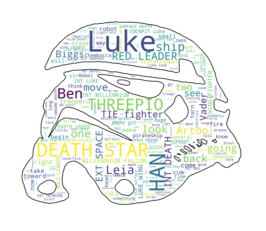

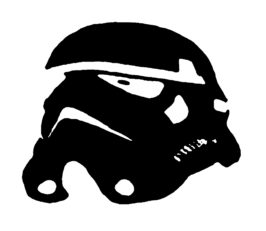

In [13]:
# 마스크 이미지 로드
mask = np.array(Image.open(path.join(d, "starwars_mask.png")))

# 워드 클라우드 설정
# contour_width : 윤곽선 두께
# contour_color : 윤곽선 색
wc = WordCloud(background_color="white", mask=mask, 
               contour_width=3, contour_color='black')

# 워드 클라우드 생성
wc.generate(text)

# 파일로 저장
wc.to_file(path.join(d, "starwars.png"))

# 이미지 표시
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


<br>
<br>

# 앨리스 예제

In [14]:
# 텍스트 로드
text = open(path.join(d, 'alice.txt')).read()
print(text)


Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'


In [15]:
# 마스크 이미지 로드
mask = np.array(Image.open(path.join(d, "alice_mask.png")))

# 워드 클라우드 내장 불용어
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

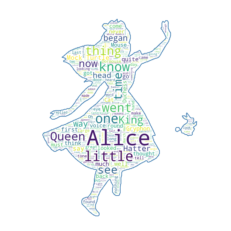

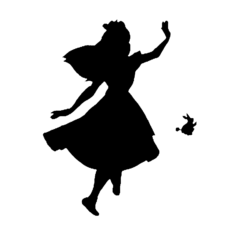

In [16]:
# 워드 클라우드 설정
wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# 워드 클라우드 생성
wc.generate(text)

# 파일로 저장
wc.to_file(path.join(d, "alice.png"))

# 이미지 표시
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


<br>
<br>

# 웹 크롤링 후 워드 클라우드 생성

In [17]:
import requests
import re
from bs4 import BeautifulSoup

# 방탄소년단 위키
base_url = 'https://namu.wiki/w/%EB%B0%A9%ED%83%84%EC%86%8C%EB%85%84%EB%8B%A8'

# 웹페이지를 가져옴
req = requests.get(base_url)
html = req.content
html


b'<!DOCTYPE html>\n<html>\n<head>\n<title>\xeb\xb0\xa9\xed\x83\x84\xec\x86\x8c\xeb\x85\x84\xeb\x8b\xa8 - \xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4</title>\n<meta charset="utf-8">\n<meta http-equiv="x-ua-compatible" content="ie=edge">\n<meta http-equiv="x-pjax-version" content="none">\n<meta name="generator" content="the seed">\n<meta name="application-name" content="\xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4">\n<meta name="mobile-web-app-capable" content="yes">\n<meta name="msapplication-tooltip" content="\xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4">\n<meta name="msapplication-starturl" content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8">\n<link rel="canonical" href="https://namu.wiki/w/%EB%B0%A9%ED%83%84%EC%86%8C%EB%85%84%EB%8B%A8">\n<link rel="search" type="application/opensearchdescription+xml" title="\xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4" href="/opensearch.xml">\n<link rel="copyright" href="//creativecommons.org/licenses/by-nc-sa/2.0/kr

In [18]:
# HTML 태그를 제거
text = BeautifulSoup(html, "lxml").text

# 기호 제거
text = re.sub('\\n', '', text)
text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]', '', text)
text


'방탄소년단  나무위키최근 변경최근 토론특수 기능게시판작성이 필요한 문서고립된 문서분류가 되지 않은 문서편집된 지 오래된 문서내용이 짧은 문서내용이 긴 문서차단 내역RandomPage파일 올리기라이선스라이브랜덤채팅 채널전체 채널오늘의 라이브종합 헤드라인잡담 채널유머이슈 채널포인트 게임 채널사회 채널성소수자 채널게임 채널스포츠 채널도시·지리 채널18068247186Please login스킨 설정어두운 화면으로내 문서 기여 목록내 토론 기여 목록로그인최근 변경0000갱신중더 보기adsbygoogle  windowadsbygoogle  push헤드라인 최신글0000갱신중더 보기adsbygoogle  windowadsbygoogle  push46역링크토론편집역사ACL방탄소년단최근 수정 시각 20190912 101121adsbygoogle  windowadsbygoogle  push분류방탄소년단 \xa0 BTS는 여기로 연결됩니다 다른 뜻에 대한 내용은 BTS동음이의어 문서를 참조하십시오 \xa0 로그인 후 편집 가능한 문서입니다    펼치기 · 접기  설립자 및 대표 프로듀서  방시혁  ARTISTS  방탄소년단  이현\xa0 투모로우바이투게더  프로듀서  디렉터  Pdogg  Slow Rabbit\xa0 Supreme Boi  ADORA  민희진\xa0 천혜림  손성득  김성현\xa0 진슈가제이홉RM지민뷔정국뷔 슈가 진 정국 RM 지민 제이홉Concept Photo LightsBoy With Luv1방탄소년단 BTS2防彈少年團  防弾少年団  防弹少年团3활동 시기2013년 6월 13일4 2282일째 활동 중5데뷔 음반2 COOL 4 SKOOL리더RM장르랩 댄스 발라드 일렉트로닉 RB소속사레이블유통6팬덤링크공식사이트공식블로그 78 공식  멤버          공식  멤버  1 소개2 멤버21 멤버 간 케미3 특징31 스토리설정4 음반41 Discography411 빌보드 최고 순위42 Videography5 YouTube51 개요52 MVs 조회수 추이6 대중매체61 

In [19]:
from konlpy.tag import Okt

# 형태소분석기로 명사만 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(text)
nouns[:100]


C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['방탄소년단',
 '나무',
 '위키',
 '최근',
 '변경',
 '최근',
 '토론',
 '특수',
 '기능',
 '게시판',
 '작성',
 '고립',
 '분류',
 '편집',
 '내용',
 '내용',
 '문서',
 '차단',
 '역',
 '파일',
 '리기',
 '라이선스',
 '라이브',
 '랜덤',
 '채팅',
 '채널',
 '전체',
 '채널',
 '오늘',
 '라이브',
 '종합',
 '헤드라인',
 '잡담',
 '채널',
 '유머',
 '이슈',
 '채널',
 '포인트',
 '게임',
 '채널',
 '사회',
 '채널',
 '성소수자',
 '채널',
 '게임',
 '채널',
 '스포츠',
 '채널',
 '도시',
 '지리',
 '채널',
 '스킨',
 '설정',
 '두운',
 '화면',
 '문서',
 '기여',
 '목록',
 '내',
 '토론',
 '기여',
 '목록',
 '로그인',
 '최근',
 '변경',
 '갱신',
 '더',
 '보기',
 '헤드라인',
 '최신',
 '글',
 '갱신',
 '더',
 '보기',
 '역',
 '링크',
 '토론',
 '편집',
 '역사',
 '방탄소년단',
 '최근',
 '수정',
 '시각',
 '분류',
 '방탄소년단',
 '여기',
 '연결',
 '다른',
 '뜻',
 '대한',
 '내용',
 '동음이의어',
 '문서',
 '참조',
 '로그인',
 '후',
 '편집',
 '문서',
 '접기',
 '설립']

In [20]:
# 배열을 텍스트로 변환
text = " ".join(nouns)
text


'방탄소년단 나무 위키 최근 변경 최근 토론 특수 기능 게시판 작성 고립 분류 편집 내용 내용 문서 차단 역 파일 리기 라이선스 라이브 랜덤 채팅 채널 전체 채널 오늘 라이브 종합 헤드라인 잡담 채널 유머 이슈 채널 포인트 게임 채널 사회 채널 성소수자 채널 게임 채널 스포츠 채널 도시 지리 채널 스킨 설정 두운 화면 문서 기여 목록 내 토론 기여 목록 로그인 최근 변경 갱신 더 보기 헤드라인 최신 글 갱신 더 보기 역 링크 토론 편집 역사 방탄소년단 최근 수정 시각 분류 방탄소년단 여기 연결 다른 뜻 대한 내용 동음이의어 문서 참조 로그인 후 편집 문서 접기 설립 및 대표 프로듀서 방시혁 방탄소년단 이현 투모로우 바이 투게더 프로듀서 디렉터 민희진 혜림 손성 득 김성현 진 슈가제이 홉 지민 뷔정국뷔 슈가 진 정국 지민 제이 홉 방탄소년단 활동 시기 활동 중 데뷔 음반 리더 장르 랩 댄스 발라드 일렉트로닉 소속사 레이블 유통 팬덤 링크 공식 사이트 공식 블로그 공식 멤버 공식 멤버 소개 멤버 멤버 간 케미 특징 스토리 설정 음반 빌보드 최고 순위 개요 회수 추이 대중매체 영화 번 더 스테이지 더 무비 러브 유 셀프 인 서울 브링 더 소울 더 무비 방송 음악 예능 라디오 인터뷰 드라마 소통 트위터 블로그 유튜브 주제 공연 팬미팅 사인회 단독 콘서트 단독 콘서트 외 광고 및 홍보 대사 광고 모델 홍보 대사 자선 및 후원 반응 및 기록 중반 중반 화양연화 중반 후반 후반 후반 후반 초반 후반 초반 중반 후반 초반 중반 중반 해외 인기 수상 팬덤 여담 논란 소개 편집 둘 셋 방 방탄소년단 인사 법 보기 대한민국 인조 보이 그룹 한국 아시아 출신 가수 통틀어 유례 정도 세계 인기 끌 전 세계 팬덤 바탕 각종 경제 문화 신드롬 역사 대한민국 대중문화 역사 획 은 최정 상급 아이돌 그룹 평가 배경 청춘 생각 삶 사랑 꿈 주요 주제 노래 통해 자신 세계관 구축 연관 스토리 뮤직비디오 통해 모습 노래 불타 피 땀 눈물 활동 팬덤 크게 형성 이후 지속 인지도 급상승 봄날 를 통

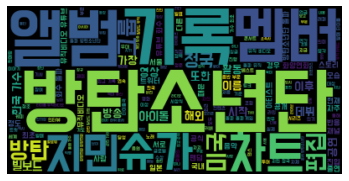

In [21]:
# 한글 폰트 경로
font_path = path.join(d, 'BMDOHYEON_ttf.ttf')

# 워드 클라우드 생성
wc = WordCloud(font_path = font_path).generate(text)

# 이미지 출력
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()
